# Wine Classification

In [11]:
%matplotlib inline
import pandas as pd
import pylab as pl
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

In [2]:
df = pd.read_csv("https://s3.amazonaws.com/demo-datasets/wine.csv")
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color,is_red,high_quality
0,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5,red,1,0
1,7.8,0.88,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,9.8,5,red,1,0
2,7.8,0.76,0.04,2.3,0.092,15,54,0.9970,3.26,0.65,9.8,5,red,1,0
3,11.2,0.28,0.56,1.9,0.075,17,60,0.9980,3.16,0.58,9.8,6,red,1,0
4,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5,red,1,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 6496
Data columns (total 15 columns):
fixed_acidity           6497 non-null float64
volatile_acidity        6497 non-null float64
citric_acid             6497 non-null float64
residual_sugar          6497 non-null float64
chlorides               6497 non-null float64
free_sulfur_dioxide     6497 non-null float64
total_sulfur_dioxide    6497 non-null float64
density                 6497 non-null float64
pH                      6497 non-null float64
sulphates               6497 non-null float64
alcohol                 6497 non-null float64
quality                 6497 non-null int64
color                   6497 non-null object
is_red                  6497 non-null float64
high_quality            6497 non-null float64
dtypes: float64(13), int64(1), object(1)
memory usage: 812.1+ KB


In [7]:
test_idx = np.random.uniform(0, 1, len(df)) <= 0.3
train = df[test_idx==True]
test = df[test_idx==False]

features = ['density', 'sulphates', 'residual_sugar']

results = []

In [9]:
for n in range(1, 51, 2):
    clf = KNeighborsClassifier(n_neighbors=n)
    clf.fit(train[features], train['high_quality'])
    preds = clf.predict(test[features])
    accuracy = np.where(preds==test['high_quality'], 1, 0).sum() / float(len(test))
    print("Neighbors: %d, Accuracy: %3f" % (n, accuracy))

    results.append([n, accuracy])

results = pd.DataFrame(results, columns=["n", "accuracy"])

Neighbors: 1, Accuracy: 0.754846
Neighbors: 3, Accuracy: 0.776432
Neighbors: 5, Accuracy: 0.781278
Neighbors: 7, Accuracy: 0.790529
Neighbors: 9, Accuracy: 0.793172
Neighbors: 11, Accuracy: 0.790529
Neighbors: 13, Accuracy: 0.796476
Neighbors: 15, Accuracy: 0.793833
Neighbors: 17, Accuracy: 0.798899
Neighbors: 19, Accuracy: 0.800000
Neighbors: 21, Accuracy: 0.801101
Neighbors: 23, Accuracy: 0.801542
Neighbors: 25, Accuracy: 0.802423
Neighbors: 27, Accuracy: 0.800881
Neighbors: 29, Accuracy: 0.802423
Neighbors: 31, Accuracy: 0.802643
Neighbors: 33, Accuracy: 0.803084
Neighbors: 35, Accuracy: 0.802863
Neighbors: 37, Accuracy: 0.803084
Neighbors: 39, Accuracy: 0.803084
Neighbors: 41, Accuracy: 0.803084
Neighbors: 43, Accuracy: 0.803084
Neighbors: 45, Accuracy: 0.803084
Neighbors: 47, Accuracy: 0.803084
Neighbors: 49, Accuracy: 0.803084


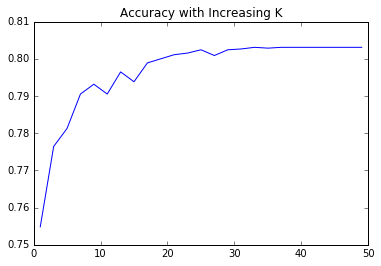

In [12]:
pl.plot(results.n, results.accuracy)
pl.title("Accuracy with Increasing K")
pl.show()